# **CS 5361/6361 Machine Learning - Performance Metrics**

**Author:** Olac Fuentes<br>
Computer Science Department<br>
University of Texas at El Paso<br>
**Last modified:** 9/4/2024<br>

Classifier: log_reg


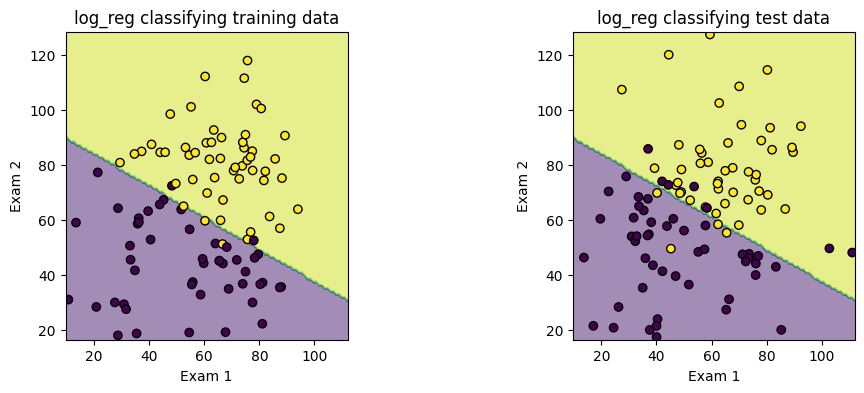

Prediction accuracy on training set: 0.9500
Prediction accuracy on test set:     0.8900
Classifier: knn


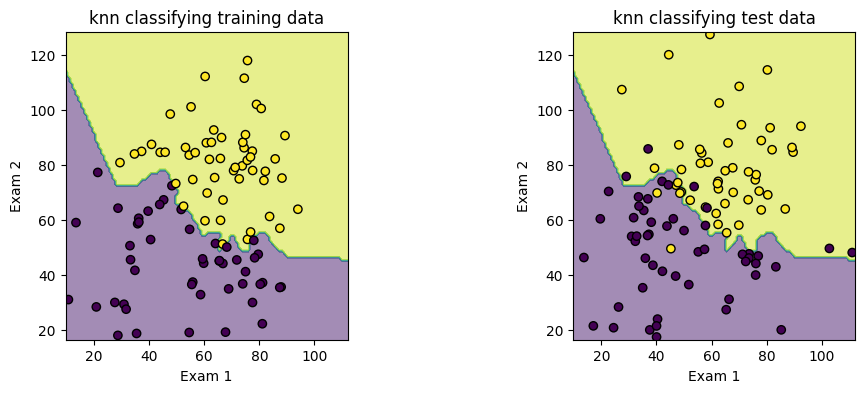

Prediction accuracy on training set: 1.0000
Prediction accuracy on test set:     0.8600
Classifier: decision tree


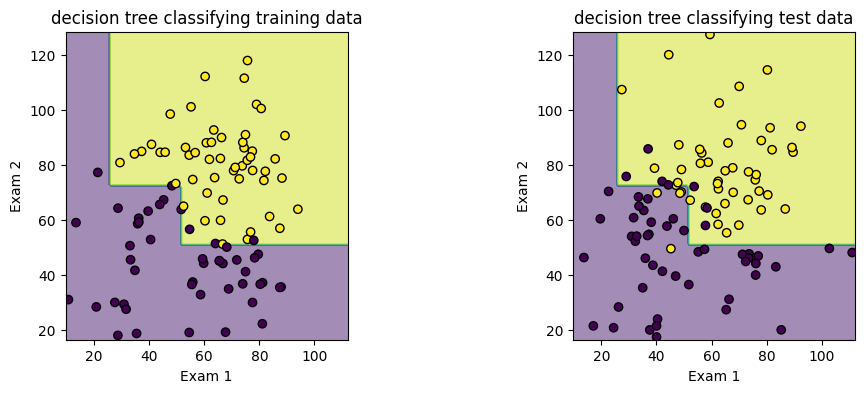

Prediction accuracy on training set: 0.9700
Prediction accuracy on test set:     0.8900


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples = [20,40,40,100],random_state=2, centers = [[35,30],[40,60],[70,40],[65,80]],cluster_std = [10,10,10,15])
y = np.int16(y==3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
classifiers = {'log_reg' : LogisticRegression(),
               'knn': KNeighborsClassifier(n_neighbors=1,weights='distance'),
               'decision tree': DecisionTreeClassifier(max_depth=3)}

for c in classifiers:
    print(f'Classifier: {c}')
    classifier = classifiers[c]
    classifier.fit(X_train, y_train)

    fig, ax = plt.subplots(1,2,figsize=(12, 4))

    disp = DecisionBoundaryDisplay.from_estimator(
      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[0],alpha=0.5)
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
    ax[0].set_title(c+' classifying training data')
    ax[0].set_aspect('equal')

    disp = DecisionBoundaryDisplay.from_estimator(
      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[1],alpha=0.5)
    disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
    ax[1].set_title(c+' classifying test data')
    ax[1].set_aspect('equal')
    plt.show()

    pred = classifier.predict(X_train)
    print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
    pred = classifier.predict(X_test)
    print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')

For binary classification, the following performance metrics are commonly used:

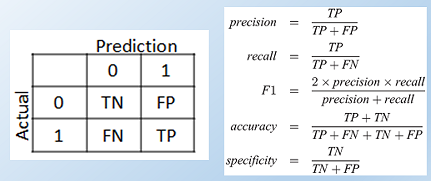

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

X, y = make_blobs(n_samples = [20,40,40,100],random_state=2, centers = [[35,30],[40,60],[70,40],[65,80]],cluster_std = [10,10,10,15])
y = np.int16(y==3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
classifiers = {'log_reg' : LogisticRegression(),
               'knn': KNeighborsClassifier(n_neighbors=1,weights='distance'),
               'decision tree': DecisionTreeClassifier(max_depth=3)}

for c in classifiers:
    print(f'Classifier: {c}')
    classifier = classifiers[c]
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    print(f'Confusion matrix:\n{confusion_matrix(y_test,pred)}')
    print(f'Accuracy: {accuracy_score(y_test,pred):6.4f}')
    print(f'Precision: {precision_score(y_test,pred):6.4f}')
    print(f'Recall: {recall_score(y_test,pred):6.4f}')
    print(f'F1: {f1_score(y_test,pred):6.4f}')

Classifier: log_reg
Confusion matrix:
[[45  7]
 [ 4 44]]
Accuracy: 0.8900
Precision: 0.8627
Recall: 0.9167
F1: 0.8889
Classifier: knn
Confusion matrix:
[[45  7]
 [ 7 41]]
Accuracy: 0.8600
Precision: 0.8542
Recall: 0.8542
F1: 0.8542
Classifier: decision tree
Confusion matrix:
[[46  6]
 [ 5 43]]
Accuracy: 0.8900
Precision: 0.8776
Recall: 0.8958
F1: 0.8866
